In [1]:

import numpy as np
import pandas as pd 
from matplotlib import pyplot as p
import seaborn as sns


In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
train.shape

(1460, 81)

In [4]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
s = train.isna().sum()
s = s.sort_values(ascending=False)

s_dataframe = pd.DataFrame()

for i in s.index : 
    if s[i]>0 : 
        dataframe = pd.DataFrame([s[i]],[i])
        s_dataframe = s_dataframe.append(dataframe)
        
s_dataframe
    

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [6]:
train = train.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1)
test = test.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [8]:
data = [train,test]
for dataset in data : 
    cols = dataset.select_dtypes(include="object").columns
    for col in cols : 
         dataset[col] = dataset[col].astype("category").cat.codes+1
    

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,5,3,3,4,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,80.0,9600,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,4,5,2,3,4,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,68.0,11250,2,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,5,3,3,4,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,60.0,9550,2,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,4,5,1,4,2,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,0,2,2006,9,1,140000
4,5,60,4,84.0,14260,2,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,5,3,3,4,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,0,12,2008,9,5,250000


In [10]:
for i in train.columns : 
    if train[i].isna().sum() > 0 : 
        print(i)
        print(train[i].isna().sum())


LotFrontage
259
MasVnrArea
8
GarageYrBlt
81


In [11]:

for dataset in data : 
    dataset["LotFrontage"].fillna(dataset.groupby("Neighborhood")["LotFrontage"].transform("median"),inplace=True)
    dataset["MasVnrArea"].fillna(dataset.groupby("Neighborhood")["MasVnrArea"].transform("median"),inplace=True)
    #fill with must commun year
    dataset["GarageYrBlt"].fillna(dataset["GarageYrBlt"].value_counts().index[0],inplace=True)

In [12]:
for i in test.columns : 
    if test[i].isna().sum() > 0 : 
        print(i)
        print(test[i].isna().sum())
        test[i].fillna(0,inplace=True)

BsmtFinSF1
1
BsmtFinSF2
1
BsmtUnfSF
1
TotalBsmtSF
1
BsmtFullBath
2
BsmtHalfBath
2
GarageCars
1
GarageArea
1


In [13]:
id_test = test["Id"]

train = train.drop("Id",axis=1)
test = test.drop("Id",axis=1)


In [14]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,65.0,8450,2,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,5,3,3,4,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,0,2,2008,9,5,208500
1,20,4,80.0,9600,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,4,5,2,3,4,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,0,5,2007,9,5,181500
2,60,4,68.0,11250,2,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,5,3,3,4,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,0,9,2008,9,5,223500
3,70,4,60.0,9550,2,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,4,5,1,4,2,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,0,2,2006,9,1,140000
4,60,4,84.0,14260,2,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,5,3,3,4,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,0,12,2008,9,5,250000
5,50,4,85.0,14115,2,1,4,1,5,1,12,3,3,1,1,5,5,1993,1995,2,2,13,14,3,0.0,4,5,6,3,4,4,3,732,6,0,64,796,2,1,2,5,796,566,0,1362,1,0,1,1,1,1,4,5,7,0,2,1993.0,3,2,480,5,5,3,40,30,0,320,0,0,700,10,2009,9,5,143000
6,20,4,75.0,10084,2,4,4,1,5,1,22,3,3,1,3,8,5,2004,2005,2,2,13,14,4,186.0,3,5,3,1,4,1,3,1369,6,0,317,1686,2,1,2,5,1694,0,0,1694,1,0,2,0,3,1,3,7,7,1,2,2004.0,2,2,636,5,5,3,255,57,0,0,0,0,0,8,2007,9,5,307000
7,60,4,80.0,10382,2,1,4,1,1,1,15,5,3,1,6,7,6,1973,1973,2,2,7,7,4,240.0,4,5,2,3,4,3,1,859,2,32,216,1107,2,1,2,5,1107,983,0,2090,1,0,2,1,3,1,4,7,7,2,2,1973.0,2,2,484,5,5,3,235,204,228,0,0,0,350,11,2009,9,5,200000
8,50,5,51.0,6120,2,4,4,1,5,1,18,1,3,1,1,7,5,1931,1950,2,2,4,16,3,0.0,4,5,1,4,4,4,6,0,6,0,952,952,2,3,2,2,1022,752,0,1774,0,0,2,0,2,2,4,8,3,2,6,1931.0,3,2,468,2,5,3,90,0,205,0,0,0,0,4,2008,9,1,129900
9,190,4,50.0,7420,2,4,4,1,1,1,4,1,1,2,2,5,6,1939,1950,2,2,9,9,3,0.0,4,5,1,4,4,4,3,851,6,0,140,991,2,1,2,5,1077,0,0,1077,1,0,1,0,2,2,4,5,7,2,2,1939.0,2,1,205,3,5,3,0,4,0,0,0,0,0,1,2008,9,5,118000


In [15]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = train.drop("SalePrice",axis=1).copy()
y = train["SalePrice"]

features = SelectKBest(score_func=chi2,k=20)
prediction = features.fit(x,y)
dataframe_col = pd.DataFrame(x.columns)
dataframe_score = pd.DataFrame(prediction.scores_)

dataframe = pd.concat([dataframe_col,dataframe_score],axis=1)

dataframe.columns = ['Index','Scores']
dataframe.nsmallest(40,'Scores')

,Index,Scores
7,Utilities,0.165868
71,YrSold,0.602971
4,Street,1.821542
12,Condition2,18.249217
39,CentralAir,25.996526
50,KitchenAbvGr,28.490834
37,Heating,34.409295
9,LandSlope,52.205825
62,PavedDrive,60.626830
26,ExterCond,69.227618


In [16]:
# small = 1 , medium = 2 , large = 3 , very large = 4 

#train.loc[train["LotArea"]<=5000,"LotArea"] = 1 
#train.loc[(train["LotArea"]>5000)&(train["LotArea"]<=10000),"LotArea"] = 2 
#train.loc[(train["LotArea"]>10000)&(train["LotArea"]<=20000),"LotArea"] = 3 
#train.loc[train["LotArea"]>20000,"LotArea"] = 4


In [17]:
# small = 1 , medium = 2 , large = 3 , very large = 4 

#train.loc[train["BsmtFinSF1"]<=400,"BsmtFinSF1"] = 1 
#train.loc[(train["BsmtFinSF1"]>400)&(train["BsmtFinSF1"]<=800),"BsmtFinSF1"] = 2 
#train.loc[(train["BsmtFinSF1"]>800)&(train["BsmtFinSF1"]<=1200),"BsmtFinSF1"] = 3 
#train.loc[(train["BsmtFinSF1"]>1200)&(train["BsmtFinSF1"]<=1600),"BsmtFinSF1"] = 4
#train.loc[train["BsmtFinSF1"]>1600,"BsmtFinSF1"] = 5


In [18]:
#train = train.drop("BsmtFinSF2",axis=1)
train = train.drop("LowQualFinSF",axis=1)
train = train.drop("PoolArea",axis=1)
#train = train.drop("2ndFlrSF",axis=1)
#train = train.drop("MasVnrArea",axis=1)
train = train.drop("MiscVal",axis=1)
#train = train.drop("BsmtUnfSF",axis=1)

#test = test.drop("BsmtFinSF2",axis=1)
test = test.drop("LowQualFinSF",axis=1)
test = test.drop("PoolArea",axis=1)
#test = test.drop("2ndFlrSF",axis=1)
#test = test.drop("MasVnrArea",axis=1)
test = test.drop("MiscVal",axis=1)
#test = test.drop("BsmtUnfSF",axis=1)


In [19]:
#train.SalePrice = np.log(train.SalePrice)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,65.0,8450,2,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,5,3,3,4,4,3,706,6,0,150,856,2,1,2,5,856,854,1710,1,0,2,1,3,1,3,8,7,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,2,2008,9,5,208500
1,20,4,80.0,9600,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,4,5,2,3,4,2,1,978,6,0,284,1262,2,1,2,5,1262,0,1262,0,1,2,0,3,1,4,6,7,1,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,5,2007,9,5,181500
2,60,4,68.0,11250,2,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,5,3,3,4,3,3,486,6,0,434,920,2,1,2,5,920,866,1786,1,0,2,1,3,1,3,6,7,1,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,9,2008,9,5,223500
3,70,4,60.0,9550,2,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,4,5,1,4,2,4,1,216,6,0,540,756,2,3,2,5,961,756,1717,1,0,1,0,3,1,3,7,7,1,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,2,2006,9,1,140000
4,60,4,84.0,14260,2,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,5,3,3,4,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,2198,1,0,2,1,4,1,3,9,7,1,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,12,2008,9,5,250000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


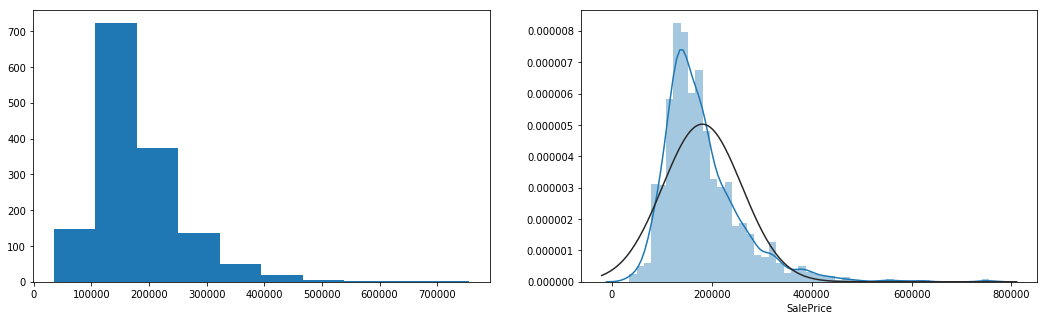

In [20]:

from scipy import stats 

f , ( a1 , a2 ) = p.subplots(1,2,figsize=(18,5))
p.sca(a1)
p.hist(train.SalePrice)
p.sca(a2)
sns.distplot(train.SalePrice,fit=stats.norm)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


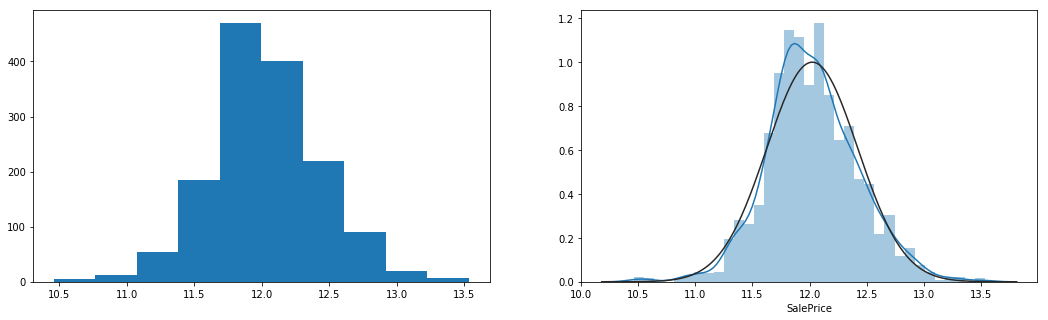

In [21]:

f , ( a1 , a2 ) = p.subplots(1,2,figsize=(18,5))
p.sca(a1)
p.hist(np.log(train.SalePrice))
p.sca(a2)
sns.distplot(np.log(train.SalePrice),fit=stats.norm)

skewed 
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/


In [22]:

for col in dataframe.nsmallest(28,"Scores").Index : 
        train = train.drop(col,axis=1)
        test = test.drop(col,axis=1)

train.head()
        

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,Exterior1st,Exterior2nd,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice
0,60,65.0,8450,4,5,6,1,6,7,2003,13,14,196.0,3,4,3,706,6,0,150,856,1,856,854,1710,1,0,1,8,0,2,2003.0,2,2,548,5,5,0,61,0,0,0,2,208500
1,20,80.0,9600,4,3,25,1,3,6,1976,9,9,0.0,3,2,1,978,6,0,284,1262,1,1262,0,1262,0,1,0,6,1,2,1976.0,2,2,460,5,5,298,0,0,0,0,5,181500
2,60,68.0,11250,1,5,6,1,6,7,2001,13,14,162.0,3,3,3,486,6,0,434,920,1,920,866,1786,1,0,1,6,1,2,2001.0,2,2,608,5,5,0,42,0,0,0,9,223500
3,70,60.0,9550,1,1,7,1,6,7,1915,14,16,0.0,4,4,1,216,6,0,540,756,3,961,756,1717,1,0,0,7,1,6,1998.0,3,3,642,5,5,0,35,272,0,0,2,140000
4,60,84.0,14260,1,3,16,1,6,8,2000,13,14,350.0,3,1,3,655,6,0,490,1145,1,1145,1053,2198,1,0,1,9,1,2,2000.0,2,3,836,5,5,192,84,0,0,0,12,250000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
 <a list of 44 Text xticklabel objects>)

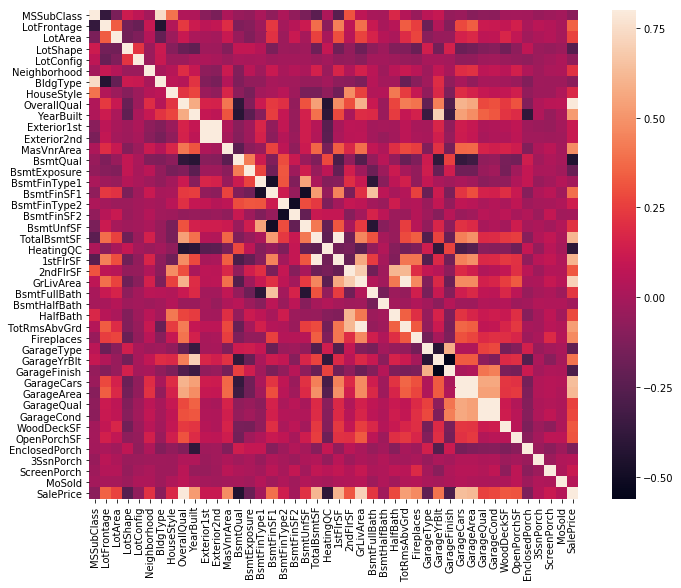

In [23]:
m = train.corr()
#p.imshow(m,cmap="hot",interpolation="nearest")
f, ax = p.subplots(figsize=(12, 9))
sns.heatmap(m, vmax=.8, square=True)
p.yticks(rotation=0)
p.xticks(rotation=90)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

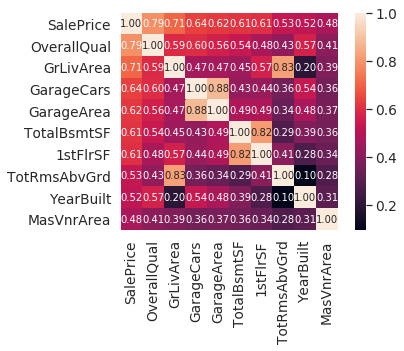

In [24]:
cols = m.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
p.yticks(rotation=0)
p.xticks(rotation=90)

TotalBsmtSF equals to the sum of BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF, which means that by keeping the TotalBsmtSF, BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF are able to be eliminated.
GarageArea and GarageCars have high correlation between them and with SalePrice, so we only keep one of them

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


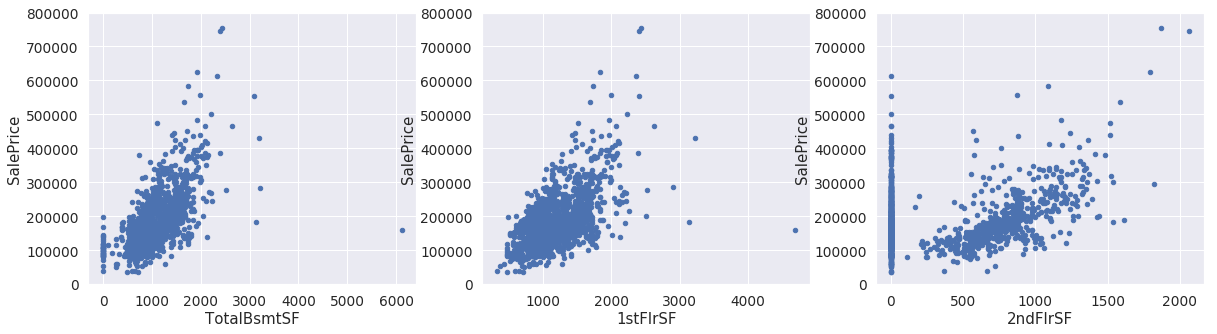

In [25]:
f , ( ax1 , ax2 , ax3 ) = p.subplots(1,3,figsize=(20,5))
dataframe1 = pd.concat([train["SalePrice"],train["TotalBsmtSF"]],axis=1)
dataframe2 = pd.concat([train["SalePrice"],train["1stFlrSF"]],axis=1)
dataframe3 = pd.concat([train["SalePrice"],train["2ndFlrSF"]],axis=1)

dataframe1.plot.scatter(x="TotalBsmtSF",y="SalePrice",ylim=(0, 800000), ax=ax1)
dataframe2.plot.scatter(x="1stFlrSF",y="SalePrice",ylim=(0, 800000), ax=ax2)
dataframe3.plot.scatter(x="2ndFlrSF",y="SalePrice",ylim=(0, 800000), ax=ax3)


* TotalBsmtSF: Total square feet of basement area.
* 1stFlrSF: First Floor square feet.
* 2ndFlrSF: Second floor square feet.

all of them are the area information of the house and their relationships with SalePrice are similar
we create a new feature named as TotalSF to add those three features, then drop them.

In [26]:
train = train.drop(["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"],axis=1)
train["TotalSF"] = train["TotalBsmtSF"]+train["1stFlrSF"]+train["2ndFlrSF"]
train = train.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1)
train = train.drop("GarageArea",axis=1)

test = test.drop(["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"],axis=1)
test["TotalSF"] = test["TotalBsmtSF"]+test["1stFlrSF"]+test["2ndFlrSF"]
test = test.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1)
test = test.drop("GarageArea",axis=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


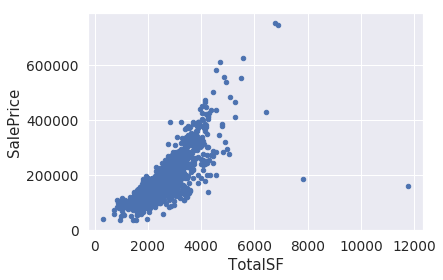

In [27]:
dataframe = pd.concat([train["SalePrice"],train["TotalSF"]],axis=1)
dataframe.plot.scatter(x="TotalSF",y="SalePrice")

**Random forest**

In [28]:
from matplotlib import pyplot as p 

def plot_precis(y,prediction,i) :
    f1 = p.figure(i)
    p.plot(y,y)
    p.scatter(y,prediction)


In [29]:
def plot_prediction(y,prediction,i) : 
    s = np.arange(0,y.shape[0])

    f3 = p.figure(i)

    f3 , (a1 , a2 ) = p.subplots(1,2,figsize=(10,5))
    p.sca(a1)
    p.plot(s,y)
    p.plot(s,prediction)
    p.sca(a2)
    p.plot(s,np.sort(y))
    p.plot(s,np.sort(prediction))

In [30]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

regression = RandomForestRegressor()

x = train.drop("SalePrice",axis=1).copy()
x , x_test = train_test_split(x,test_size=0.01)
y = train["SalePrice"]
y , y_test = train_test_split(y,test_size=0.01)

y_train = np.log(y)
y_test_v = np.log(y_test)

regression.fit(x,y_train)

prediction = regression.predict(x)
test_prediction = regression.predict(x_test)

cst = mean_squared_error(y_train,prediction)

print(cst)

0.032674302897817725


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


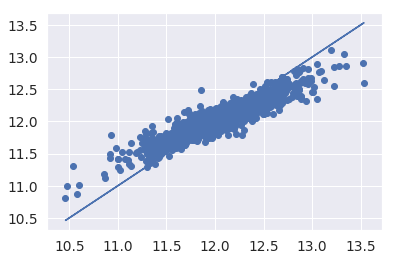

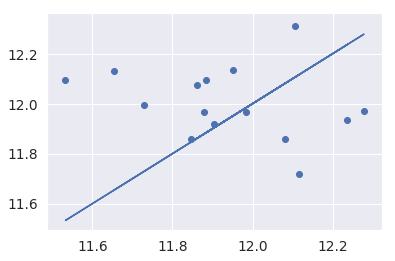

<Figure size 432x288 with 0 Axes>

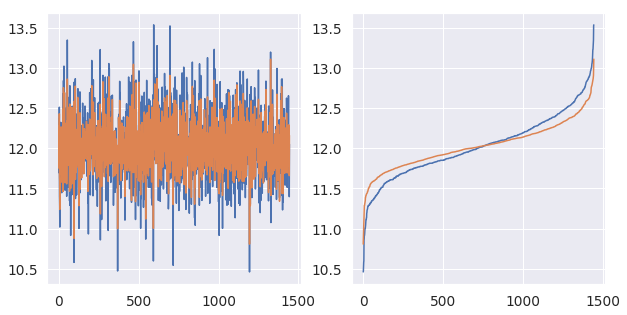

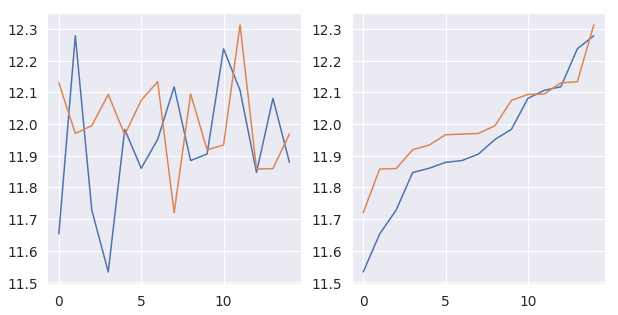

In [31]:

plot_precis(y_train,prediction,1)
plot_precis(y_test_v,test_prediction,2)

plot_prediction(y_train,prediction,3)
plot_prediction(y_test_v,test_prediction,4)



In [32]:

from sklearn.linear_model import LinearRegression 

regression = LinearRegression()


regression.fit(x,y_train)

prediction = regression.predict(x)
prediction_test = regression.predict(x_test)


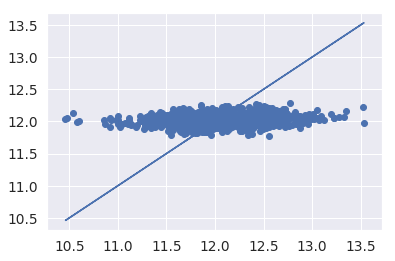

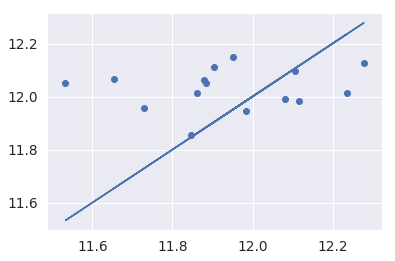

<Figure size 432x288 with 0 Axes>

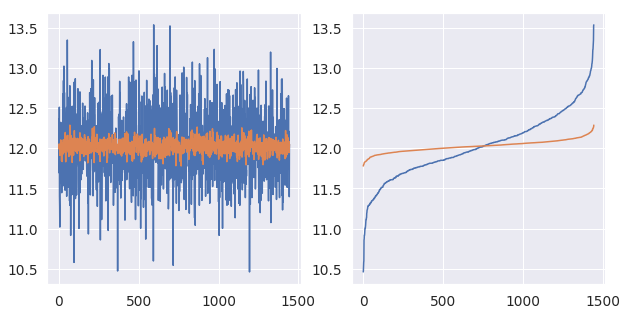

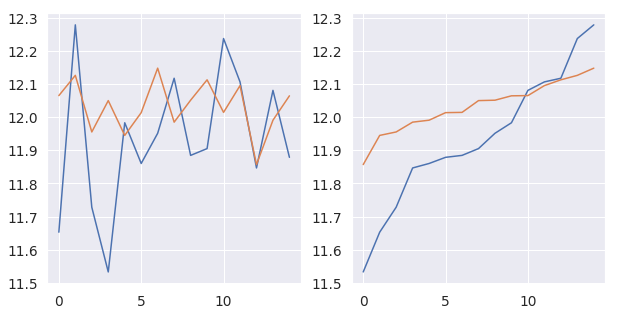

In [33]:
plot_precis(y_train,prediction,1)
plot_precis(y_test_v,prediction_test,2)

plot_prediction(y_train,prediction,3)
plot_prediction(y_test_v,prediction_test,4)


In [34]:
print('R square is: {}'.format(regression.score(x_test, y_test)))

R square is: -25.5715806281923


**Neural network**

In [35]:

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler 


regression = MLPRegressor(activation='identity', alpha=1e-05, batch_size='auto',
              #epsilon=1e-08,
              hidden_layer_sizes=(3, 4),
              learning_rate='constant', learning_rate_init=0.0005,
              max_iter=200, 
              solver="sgd",
              #momentum=0.9, n_iter_no_change=10,
              validation_fraction=0.1, verbose=True, warm_start=False)

#x = train.drop("SalePrice",axis=1).copy()
#x , x_test = train_test_split(x,test_size=0.2)
#y = train["SalePrice"]
#y , y_test = train_test_split(y,test_size=0.2)

x_scaled = x.copy()
x_test_scaled = x_test.copy()

for col in x.columns : 
    x_scaled[col] = (x[col]-np.min(x[col])) / (np.max(x[col])-np.min(x[col]))
    x_test_scaled[col] = (x_test[col]-np.min(x_test[col])) / (np.max(x_test[col])-np.min(x_test[col]))
    

y_train = np.log(y)
y_test_v = np.log(y_test)

y_scaled = (y_train-np.min(y_train)) / (np.max(y_train)-np.min(y_train))
#y_test_scaled = (y_test_v-np.min(y_test_v)) / (np.max(y_test_v)-np.min(y_test_v))
y_test_scaled = (y_test_v-np.min(y_train)) / (np.max(y_train)-np.min(y_train))


y_train_nn = y_scaled

regression.fit(x_scaled,y_train_nn)

prediction = regression.predict(x_scaled)
test_prediction = regression.predict(x_test_scaled)

cst = mean_squared_error(y_train_nn,prediction)

print(cst)


Iteration 1, loss = 1.10493659
Iteration 2, loss = 0.33008249
Iteration 3, loss = 0.34220419
Iteration 4, loss = 0.22790005
Iteration 5, loss = 0.19556030
Iteration 6, loss = 0.17353709
Iteration 7, loss = 0.15377957
Iteration 8, loss = 0.13960085
Iteration 9, loss = 0.12795892
Iteration 10, loss = 0.11801369
Iteration 11, loss = 0.10951798
Iteration 12, loss = 0.10239068
Iteration 13, loss = 0.09576634
Iteration 14, loss = 0.09027425
Iteration 15, loss = 0.08525384
Iteration 16, loss = 0.08088986
Iteration 17, loss = 0.07691553
Iteration 18, loss = 0.07354680
Iteration 19, loss = 0.07043762
Iteration 20, loss = 0.06758561
Iteration 21, loss = 0.06503367
Iteration 22, loss = 0.06270266
Iteration 23, loss = 0.06057404
Iteration 24, loss = 0.05862326
Iteration 25, loss = 0.05674298
Iteration 26, loss = 0.05507833
Iteration 27, loss = 0.05350234
Iteration 28, loss = 0.05210836
Iteration 29, loss = 0.05078546
Iteration 30, loss = 0.04953819
Iteration 31, loss = 0.04837458
Iteration 32, los

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

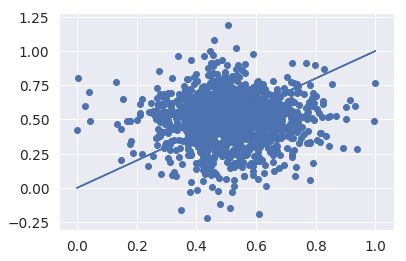

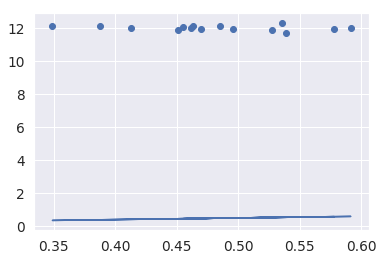

<Figure size 432x288 with 0 Axes>

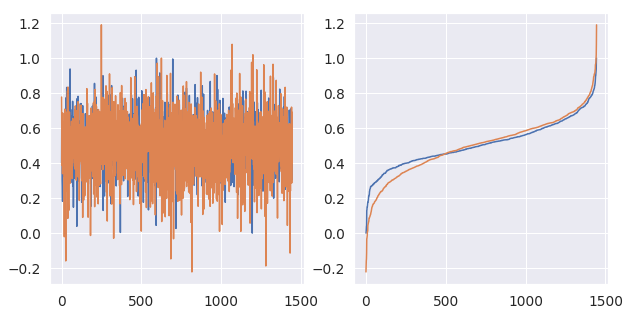

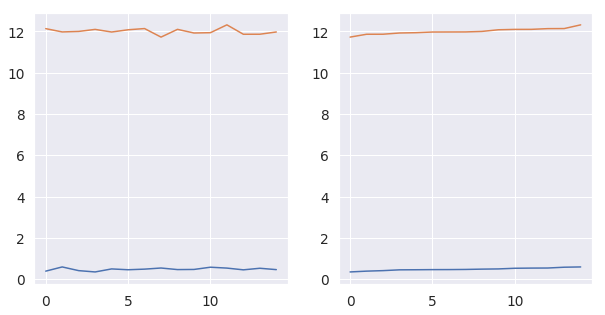

In [36]:

plot_precis(y_train_nn,prediction,1)
plot_precis(y_test_scaled,test_prediction,2)

plot_prediction(y_train_nn,prediction,3)
plot_prediction(y_test_scaled,test_prediction,4)



In [37]:

test_scaled = test.copy()

for col in test.columns : 
    test_scaled[col] = (test[col]-np.min(test[col])) / (np.max(test[col])-np.min(test[col]))
    
  
 
subpred = regression.predict(test_scaled)

subpred = subpred * (np.max(y_train)-np.min(y_train)) + np.min(y_train)

subpred = np.exp(subpred)

dataframe_s = pd.DataFrame(subpred)
dataframe = pd.concat([id_test,dataframe_s],axis=1)

dataframe.columns = {"SalePrice","Id"}

dataframe
submission = dataframe.to_csv("submission.csv",index=False)

#subpred.max()

In [38]:
print(np.max(y_train))
print(np.max(y_test))
print(np.max(prediction))

13.534473028231162
215000
1.1907526949881766


In [39]:
import tensorflow as tf

In [40]:
'''x_scaled = np.asarray(x_scaled)
y_scaled = np.asarray(y_scaled)
x_test_scaled = np.asarray(x_test_scaled)
y_test_scaled = np.asarray(y_test_scaled).reshape(y_test_scaled.shape[0],1)

tf.reset_default_graph()

x_t = tf.placeholder(tf.float32,shape=(None,x_scaled.shape[1]),name="x_t")

y_log = y_scaled #np.log(y)
y_test_log = y_test_scaled #np.log(y_test)

input = x_scaled.shape[1]
layer1_nodes = 10
layer2_nodes = 10
layer3_nodes = 20
layer31_nodes = 20
layer32_nodes = 20
output = 1 

epoch = 1000 
learning_rate = 0.0005

with tf.variable_scope("l1_3",reuse=tf.AUTO_REUSE) : 
    w1 = tf.get_variable("w1",shape=(input,layer1_nodes),initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1",shape=(1,layer1_nodes),initializer=tf.zeros_initializer())
    l1 = tf.nn.relu(tf.matmul(x_t,w1)+b1)
with tf.variable_scope("l2_3",reuse=tf.AUTO_REUSE) : 
    w2 = tf.get_variable("w2",shape=(layer1_nodes,layer2_nodes),initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2",shape=(1,layer2_nodes),initializer=tf.zeros_initializer())
    l2 = tf.nn.relu(tf.matmul(l1,w2)+b2)
with tf.variable_scope("l3_3",reuse=tf.AUTO_REUSE) : 
    w3 = tf.get_variable("w3",shape=(layer2_nodes,layer3_nodes),initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3",shape=(1,layer3_nodes),initializer=tf.zeros_initializer())
    l3 = tf.nn.relu(tf.matmul(l2,w3)+b3)
with tf.variable_scope("l3.1_3",reuse=tf.AUTO_REUSE) : 
    w31 = tf.get_variable("w3.1",shape=(layer3_nodes,layer31_nodes),initializer=tf.contrib.layers.xavier_initializer())
    b31 = tf.get_variable("b3.1",shape=(1,layer31_nodes),initializer=tf.zeros_initializer())
    l31 = tf.nn.relu(tf.matmul(l3,w31)+b31)
with tf.variable_scope("l3.2_3",reuse=tf.AUTO_REUSE) : 
    w32 = tf.get_variable("w3.2",shape=(layer31_nodes,layer32_nodes),initializer=tf.contrib.layers.xavier_initializer())
    b32 = tf.get_variable("b3.2",shape=(1,layer32_nodes),initializer=tf.zeros_initializer())
    l32 = tf.nn.relu(tf.matmul(l31,w32)+b32)
with tf.variable_scope("output_3",reuse=tf.AUTO_REUSE) : 
    w4 = tf.get_variable("w4",shape=(layer32_nodes,output),initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.get_variable("b4",shape=(1,output),initializer=tf.zeros_initializer())
    l4 = tf.nn.relu(tf.matmul(l32,w4)+b4)
with tf.variable_scope("cost_3",reuse=tf.AUTO_REUSE) : 
    y_t = tf.placeholder(tf.float32,shape=y.shape,name="y_t")
    cost = tf.reduce_mean(tf.squared_difference(y_t,l4))
with tf.variable_scope("train",reuse=tf.AUTO_REUSE) : 
    trains = tf.train.AdamOptimizer(learning_rate).minimize(cost)

    
init = tf.global_variables_initializer() 

cst = np.zeros([epoch,1])

with tf.Session() as session : 
    
    session.run(init)
    
    for i in range(epoch) : 
        
        session.run(trains,feed_dict={x_t:x_scaled,y_t:y_log})
        
        cst[i] = session.run(cost,feed_dict={x_t:x_scaled,y_t:y_log})
        
        if i % 10 == 0 : 
            print("Epoch {0} cost {1}".format(i,cst[i]))
        
        
    prediction = session.run(l4,feed_dict={x_t:x_scaled})
    
    prediction_test = session.run(l4,feed_dict={x_t:x_test_scaled})     '''
    

'x_scaled = np.asarray(x_scaled)\ny_scaled = np.asarray(y_scaled)\nx_test_scaled = np.asarray(x_test_scaled)\ny_test_scaled = np.asarray(y_test_scaled).reshape(y_test_scaled.shape[0],1)\n\ntf.reset_default_graph()\n\nx_t = tf.placeholder(tf.float32,shape=(None,x_scaled.shape[1]),name="x_t")\n\ny_log = y_scaled #np.log(y)\ny_test_log = y_test_scaled #np.log(y_test)\n\ninput = x_scaled.shape[1]\nlayer1_nodes = 10\nlayer2_nodes = 10\nlayer3_nodes = 20\nlayer31_nodes = 20\nlayer32_nodes = 20\noutput = 1 \n\nepoch = 1000 \nlearning_rate = 0.0005\n\nwith tf.variable_scope("l1_3",reuse=tf.AUTO_REUSE) : \n    w1 = tf.get_variable("w1",shape=(input,layer1_nodes),initializer=tf.contrib.layers.xavier_initializer())\n    b1 = tf.get_variable("b1",shape=(1,layer1_nodes),initializer=tf.zeros_initializer())\n    l1 = tf.nn.relu(tf.matmul(x_t,w1)+b1)\nwith tf.variable_scope("l2_3",reuse=tf.AUTO_REUSE) : \n    w2 = tf.get_variable("w2",shape=(layer1_nodes,layer2_nodes),initializer=tf.contrib.layers.xav

In [41]:


'''plot_precis(y_log,prediction,1)
plot_precis(y_test_log,test_prediction,2)


f3 = p.figure(3)
p.plot(cst)


f4 = p.figure(4)

f4 , ( a1 , a2 ) = p.subplots(1,2,figsize=(10,5))

p.sca(a1)

s = np.arange(0,y.shape[0])

p.plot(s,y_log)
p.plot(s,prediction)

p.sca(a2)

p.plot(s,np.sort(y_log))
p.plot(s,np.sort(prediction))
'''

'plot_precis(y_log,prediction,1)\nplot_precis(y_test_log,test_prediction,2)\n\n\nf3 = p.figure(3)\np.plot(cst)\n\n\nf4 = p.figure(4)\n\nf4 , ( a1 , a2 ) = p.subplots(1,2,figsize=(10,5))\n\np.sca(a1)\n\ns = np.arange(0,y.shape[0])\n\np.plot(s,y_log)\np.plot(s,prediction)\n\np.sca(a2)\n\np.plot(s,np.sort(y_log))\np.plot(s,np.sort(prediction))\n'

In [42]:
'''prediction_unscaled = prediction_test * (np.max(y_test)-np.min(y_test)) + np.min(y_test)
prediction_unscaled

f2 = p.figure(2)
p.plot(y_test,y_test)
p.scatter(y_test,prediction_unscaled)'''


'prediction_unscaled = prediction_test * (np.max(y_test)-np.min(y_test)) + np.min(y_test)\nprediction_unscaled\n\nf2 = p.figure(2)\np.plot(y_test,y_test)\np.scatter(y_test,prediction_unscaled)'

In [43]:
x_scaled.T[0].min()

0.0